# Exercise 5

### 1. Estimate the integral $\int ^1 _0 e^x dx$  by simulation (the crude Monte estimator). Use eg. an estimator based on 100 samples and present the result as the point estimator and a confidence interval.

In order to estimate the following integral:
$$
\int_{0}^{1} e^x dx
$$
we use the crude Monte-Carlo estimator by simulation.

First, we let $U_1,\dots,U_n\sim\text{Uniform}(0,1)$. Then, we can write:
$$
\int_{0}^{1} e^x dx = \text{E}[e^U]
$$

This we can use to simulate $n=100$ samples of $U$ and thus, compute the point estimator $\hat{\theta}$:
$$
\hat{\theta} = \frac{1}{n}\sum_{i=1}^n e^{U_i}
$$
We perform 10 runs, of 100 samples each:


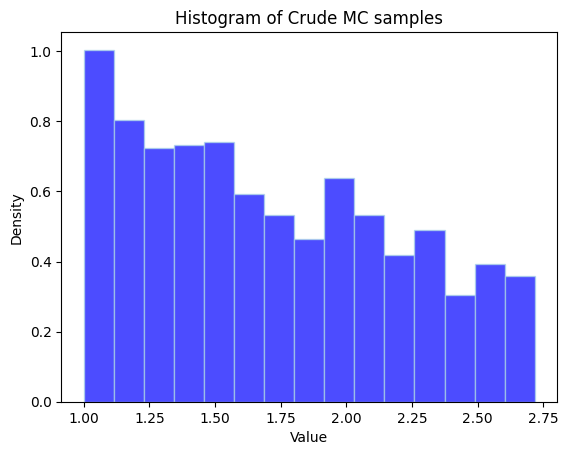

Mean estimate of the integral: 1.7120
Sample variance: 0.236983
95% confidence interval: (1.6818, 1.7422)


In [1]:
import numpy as np
import scipy.stats as stats
from scipy.stats import uniform, norm, expon
import matplotlib.pyplot as plt

samples = uniform.rvs(size=(10, 100))

xs = np.exp(samples)

all_samples = xs.flatten()

plt.hist(all_samples, bins=15, density=True, alpha=0.7, color='blue', edgecolor='lightblue')
plt.title("Histogram of Crude MC samples")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

mean = np.mean(all_samples)
variance = np.var(all_samples, ddof=1)
standard_error = np.std(all_samples, ddof=1) / np.sqrt(len(all_samples))
z = 1.96 
ci_lower = mean - z * standard_error
ci_upper = mean + z * standard_error

print(f"Mean estimate of the integral: {mean:.4f}")
print(f"Sample variance: {variance:.6f}")
print(f"95% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")

The histogram is right-skewed, meaning more values are located to the left in plot, also reflecting the nature of an exponential function.

Furthermore, the mean estimate is closely alligned to the integral's true value $e-1\approx1.718$, while the true integral value is also within the confidence bounds. Thus, Monte Carlo estimator provides an appropriate approximation. 

### 2. Estimate the integral $\int ^1 _0 e^x dx$ using antithetic variables, with comparable computer ressources.

To estimate 
$$
\int_{1}^{0} e^x dx
$$

using antithetic variables, we will utilize the variance reduction technique. Herein, we average each function $e^U$ with its antithetic pair $e^{1-U}$, aiming to cancel out any variation. We perform 10 runs, of 100 samples each:

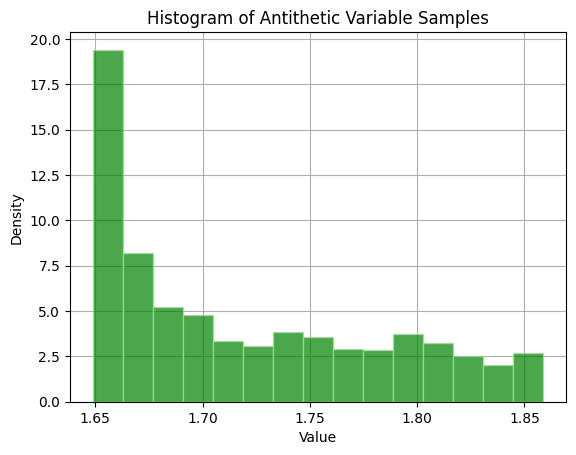

Mean estimate of the integral: 1.7188
Sample variance: 0.004073
95% confidence interval: (1.7148, 1.7227)


In [12]:
x_antithetic = (np.exp(samples) + np.exp(1 - samples)) / 2

all_samples = x_antithetic.flatten()
plt.figure()
plt.grid(True, zorder=0)
plt.hist(all_samples, bins=15, density=True, alpha=0.7,
         color='green', edgecolor='lightgreen', zorder=3)
plt.title("Histogram of Antithetic Variable Samples")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

mean = np.mean(all_samples)
variance = np.var(all_samples, ddof=1)
standard_error = np.std(all_samples, ddof=1) / np.sqrt(len(all_samples))
z = 1.96
ci_lower = mean - z * standard_error
ci_upper = mean + z * standard_error
print(f"Mean estimate of the integral: {mean:.4f}")
print(f"Sample variance: {variance:.6f}")
print(f"95% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")

The distribution in the histogram are more concentrated, having a narrower spread and a higher peak, alluding to an exponential distribution more. It also has a lower variance than the previous method. 

As for the mean of 1.7188, it approximates $e-1\approx1.718$ more than the previous method, while this method also has a narrower confidence interval.

### 3. Estimate the integral $\int ^1 _0 e^x dx$ using a control variable, with comparable computer ressources.

Estimating the integral using a control variate, we use $U\sim\text{Uniform}(0,1)$ as the control variate. We apply the corrected estimator:
$$
\hat{\theta}_{cv} = \bar{X}+c(Y-\text{E}[Y])
$$
where $c$ is chosen as to minimize the variance. As the slides say, we set $c=-0.14086 \cdot 12$:


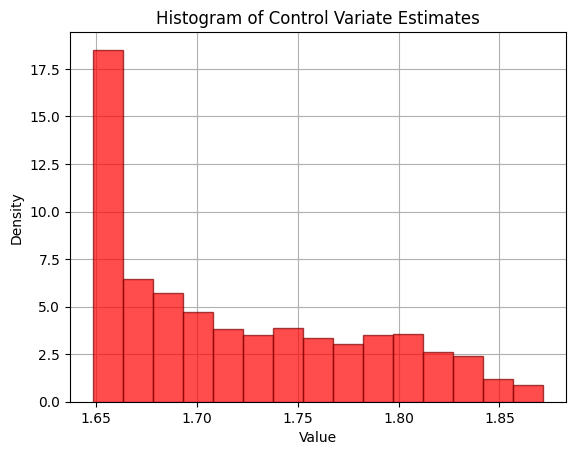

Mean estimate of the integral: 1.7189
Sample variance: 0.003939
95% confidence interval: (1.7150, 1.7228)


In [22]:
u = uniform.rvs(size=(10, 100))  
x = np.exp(u)      
c = -0.14086 * 12  
corrected = x + c * (u - 0.5)
all_samples = corrected.flatten()

plt.figure()
plt.grid(True, zorder=0)
plt.hist(all_samples, bins=15, density=True, alpha=0.7,
         color='red', edgecolor='maroon', zorder=3)
plt.title("Histogram of Control Variate Estimates")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

mean = np.mean(all_samples)
variance = np.var(all_samples, ddof=1)
standard_error = np.std(all_samples, ddof=1) / np.sqrt(len(all_samples))
z = 1.96
ci_lower = mean - z * standard_error
ci_upper = mean + z * standard_error
print(f"Mean estimate of the integral: {mean:.4f}")
print(f"Sample variance: {variance:.6f}")
print(f"95% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")



This is quite similar to the previous method and also has almost the same variance. Furthermore, the estimate and the confidence intervals are quite similar to the previous method, where the true integral value of $e-1=1.718$ is within the confidence interval, indidcating that utilizing control variates is also a valid approximation of the integral 

### 4. Estimate the integral $\int ^1 _0 e^x dx$ using stratified sampling, with comparable computer ressources

Using the stratified sampling method, we split the interval [0,1] into $n=100$ equal-width subintervals (strata). Here, in each subinterval $[\frac{i-1}{100}, \frac{i}{100}]$, one sample is drawn, ensuring even coverage, and reducing variance.

To compute the mean and the 95% confidence interval of the stratified sampling estimator, we repeat the full stratified sampling procedure a 1000 times. The resulting estimates are then used to calculate the sample mean and standard deviation, from which the confidence interval is constructed using the normal approximation.

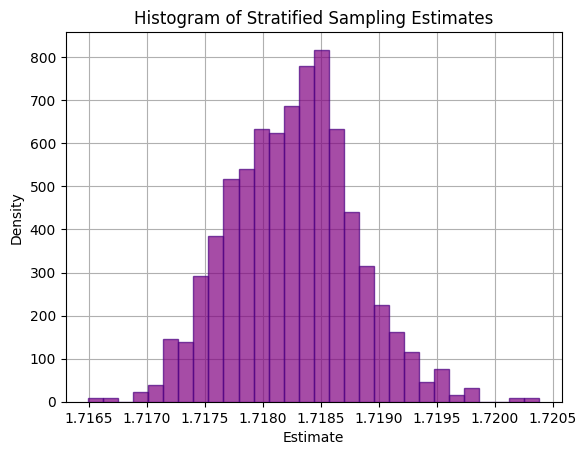

Mean estimate of the integral: 1.7183
Sample variance: 0.000000
95% confidence interval: (1.7182, 1.7183)


In [30]:
n_strata = 100
reps = 1000
estimates = []
for _ in range(reps):
    strata_edges = np.linspace(0, 1, n_strata + 1)
    samples = np.array([
        np.random.uniform(low=strata_edges[i], high=strata_edges[i+1])
        for i in range(n_strata)
    ])
    values = np.exp(samples)
    estimates.append(np.mean(values))  

estimates = np.array(estimates)
plt.figure()
plt.grid(True, zorder=0)
plt.hist(estimates, bins=30, density=True, alpha=0.7,
         color='purple', edgecolor='indigo', zorder=3)
plt.title("Histogram of Stratified Sampling Estimates")
plt.xlabel("Estimate")
plt.ylabel("Density")
plt.show()
mean = np.mean(estimates)
variance = np.var(estimates, ddof=1)
standard_error = np.std(estimates, ddof=1) / np.sqrt(len(estimates))
z = 1.96
ci_lower = mean - z * standard_error
ci_upper = mean + z * standard_error
print(f"Mean estimate of the integral: {mean:.4f}")
print(f"Sample variance: {variance:.6f}")
print(f"95% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")

Surprisingly, using the stratified sampling method does not result in an exponential-shaped distribution, but instead produces a distribution that closely resembles a normal distribution. This occurs due to the Central Limit Theorem: even though each individual sample from $\exp(U)$ follows a skewed distribution, the average of many independent estimates approximate a normal distribution.

This result in a mean estimate of the integral closest to $e-1\approx1.718$, where the variance is miniscule. Furthermore, this method has also has the narrowest confidence interval.

##  5. Use control variates to reduce the variance of the estimator in exercise 4 (Poisson arrivals).

Taking inspiration from our code in Exercise 4, here, we applied a variance reduction technique by implementing control variates in the system. Specifically, we utilized the mean interarrival time as a control variate, allowing us to adjust the original estimator by subtracting the noise, reducing the estimators variance without introducing extra bias. 

We do $n=100$ iterations in the run:

Without control variates:
Mean block rate: 0.12102, Std: 0.00673
95% CI: (0.10783, 0.13422)

With control variates:
Mean block rate: 0.12132, Std: 0.00536
95% CI: (0.11081, 0.13182)


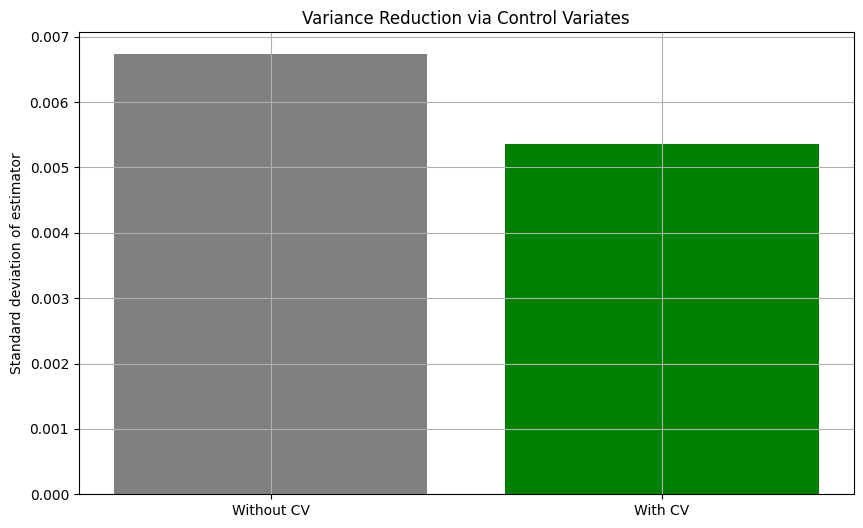

In [ ]:
import numpy as np
import heapq
from scipy.stats import expon, uniform
from enum import StrEnum
import matplotlib.pyplot as plt

np.random.seed(1234)

class Event(str, Enum):
    ARRIVED = "Arrived"
    SERVICED = "Serviced"
    BLOCKED = "Blocked"

def simulate_system_with_arrivals(arrival_times, service_time_dist, m=10):
    service_units = list(range(m))
    events = [(time, Event.ARRIVED) for time in arrival_times]
    heapq.heapify(events)

    n_blocked = 0

    while events:
        event = heapq.heappop(events)
        time, event_type = event[0], event[1]

        if event_type == Event.ARRIVED:
            if service_units:
                finish_time = time + service_time_dist.rvs()
                heapq.heappush(events, (finish_time, Event.SERVICED, service_units.pop()))
            else:
                heapq.heappush(events, (time, Event.BLOCKED))

        elif event_type == Event.SERVICED:
            service_units.append(event[2])
        elif event_type == Event.BLOCKED:
            n_blocked += 1

    return n_blocked

m = 10
n_customers = 10000
iterations = 100
service_time_dist = expon(scale=8)
lambda_poisson = 1
expected_interarrival = 1 / lambda_poisson
block_rates = np.empty(iterations)
mean_arrivals = np.empty(iterations)

for i in range(iterations):
    inter_arrivals = expon(scale=expected_interarrival).rvs(size=n_customers)
    arrival_times = np.cumsum(inter_arrivals)
    mean_arrivals[i] = np.mean(inter_arrivals)
    
    n_blocked = simulate_system_with_arrivals(arrival_times, service_time_dist, m)
    block_rates[i] = n_blocked / n_customers

c_opt = np.cov(block_rates, mean_arrivals)[0,1] / np.var(mean_arrivals)
block_rates_cv = block_rates - c_opt * (mean_arrivals - expected_interarrival)

mean_normal = np.mean(block_rates)
std_normal = np.std(block_rates)
ci_low_normal = mean_normal - 1.96 * std_normal
ci_high_normal = mean_normal + 1.96 * std_normal

mean_cv = np.mean(block_rates_cv)
std_cv = np.std(block_rates_cv)
ci_low_cv = mean_cv - 1.96 * std_cv
ci_high_cv = mean_cv + 1.96 * std_cv

print(f"Without control variates:")
print(f"Mean block rate: {mean_normal:.5f}, Std: {std_normal:.5f}")
print(f"95% CI: ({ci_low_normal:.5f}, {ci_high_normal:.5f})\n")

print(f"With control variates:")
print(f"Mean block rate: {mean_cv:.5f}, Std: {std_cv:.5f}")
print(f"95% CI: ({ci_low_cv:.5f}, {ci_high_cv:.5f})")
plt.figure(figsize=(10,6))
plt.bar(['Without CV', 'With CV'], [std_normal, std_cv], color=['gray', 'green'])
plt.ylabel("Standard deviation of estimator")
plt.title("Variance Reduction via Control Variates")
plt.grid(True)
plt.show()

Here, we see how implementing control variates to the simulation greatly benefits it, reducing variance and improving efficiency. In particular, intruducing control variates also ensures a more narrow confidence interval, ensuring greater stability and certainty. 

### 6. Demonstrate the effect of using common random numbers in exercise 4 for the difference between Poisson arrivals (Part 1) and a renewal process with hyperexponential interarrival times. Remark: You might need to do some thinking and some re-programming.

Now, we will return to exercise 4.1 and take some of the code as for inspiration.

We have set up the same system, but we compare the blocking abilities two systems: one with Poisson arrivals and one with hyperexponential interarrival times. Now, we will reimplement them but with Common Random Numbers (CRNs), hopefully reducing the variance of the difference between the systems.

As for the hyperexponential distribution we set $\lambda_1 = 1/3$, $\lambda_2 = 1/18$, and $p=1/3$, like we did in Exercise 4.

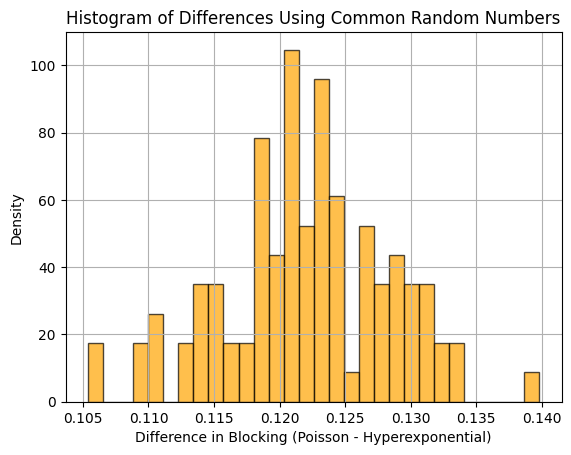

Mean difference: 0.122009
Sample variance of difference: 0.00004085
95% confidence interval for difference: (0.1208, 0.1233)


In [ ]:
class Event(StrEnum):
    ARRIVED = "Arrived"
    SERVICED = "Serviced"
    BLOCKED = "Blocked"

def generate_hyperexp_samples(u, p=0.5, lambda1=2.0, lambda2=0.5):
    selector = u < p
    samples = np.empty_like(u)
    samples[selector] = expon(scale=1/lambda1).ppf(u[selector] / p)
    samples[~selector] = expon(scale=1/lambda2).ppf((u[~selector] - p) / (1 - p))
    return samples

def simulate_system_from_arrivals(arrival_times, service_time_dist, m=10):
    service_units = [i for i in range(m)]
    events = [(time, Event.ARRIVED) for time in arrival_times]
    heapq.heapify(events)

    n_serviced = 0
    n_blocked = 0

    while events:
        event = heapq.heappop(events)
        match event:
            case (time, Event.ARRIVED):
                if service_units:
                    finish_time = time + service_time_dist.rvs()
                    heapq.heappush(events, (finish_time, Event.SERVICED, service_units.pop()))
                else:
                    heapq.heappush(events, (time, Event.BLOCKED))
            case (_, Event.SERVICED, unit):
                service_units.append(unit)
                n_serviced += 1
            case (_, Event.BLOCKED):
                n_blocked += 1

    return n_serviced, n_blocked

n_customers = 10000
m = 10
reps = 100
service_time_dist = expon(scale=8)
p = 1/3
lambda1 = 1/3
lambda2 = 1/18

differences = []

for _ in range(reps):
    uniforms = uniform.rvs(size=n_customers)

    poisson_interarrivals = expon(scale=1).ppf(uniforms)
    hyperexp_interarrivals = generate_hyperexp_samples(uniforms, p=p, lambda1=lambda1, lambda2=lambda2)

    poisson_arrivals = np.cumsum(poisson_interarrivals)
    hyperexp_arrivals = np.cumsum(hyperexp_interarrivals)

    n_served_pois, n_blocked_pois = simulate_system_from_arrivals(poisson_arrivals, service_time_dist, m)
    n_served_hyper, n_blocked_hyper = simulate_system_from_arrivals(hyperexp_arrivals, service_time_dist, m)

    block_rate_pois = n_blocked_pois / n_customers
    block_rate_hyper = n_blocked_hyper / n_customers

    diff = block_rate_pois - block_rate_hyper
    differences.append(diff)

differences = np.array(differences)
mean_diff = np.mean(differences)
var_diff = np.var(differences, ddof=1)
std_err = np.std(differences, ddof=1) / np.sqrt(len(differences))
z = 1.96
ci_low = mean_diff - z * std_err
ci_high = mean_diff + z * std_err

plt.hist(differences, bins=30, density=True, alpha=0.7, color='orange', edgecolor='black')
plt.title("Histogram of Differences Using Common Random Numbers")
plt.xlabel("Difference in Blocking (Poisson - Hyperexponential)")
plt.ylabel("Density")
plt.grid(True)
plt.show()
print(f"Mean difference: {mean_diff:.6f}")
print(f"Sample variance of difference: {var_diff:.8f}")
print(f"95% confidence interval for difference: ({ci_low:.4f}, {ci_high:.4f})")

This shows on average, the Poisson system block 12.2% more customers than the hyperexponential system does. Furthermore, the variance is quite low, and the confidence interval is narrow, suggesting implementing CRNs greatly reduced simulation noise and reduced the overall variability of the system. The histogram also supports this, being bell-shaped like a normal distribution and concentrated.

### 7. For a standard normal random variable Z ∼ N(0, 1) using the crude Monte Carlo estimator estimate the probability Z > a. Then try importance sampling with a normal density with mean a and variance σ2. For the expirements start using σ2 = 1, use different values of a (e.g. 2 and 4), and different sample sizes. If time permits experiment with other values for σ2. Finally discuss the efficiency of the methods.


To estimate $\text{P}(Z>a)$ for $Z\sim \text{N}(0,1)$ using the crude Monte-Carlo and importance sampling methods. For importance sampling, we use a $\text{N}(0,1)$ and apply a likelihood ratio weighting. The experiments are done for the values $a\in\{2,4\}$, $n\in\{1000,10000\}$, and $\sigma^2=1$, to compare the accuracies and variances:

In [17]:
for a in [2, 4]:
    print(f"a = {a}")
    print(f"Analytical solution: {1 - norm.cdf(a):.6f}")
    for n in [10, 100, 1000, 10_000]:
        print(f"N = {n}")
        zs = norm.rvs(size=n)
        
        crude = np.mean(zs > a)

        ys = norm.rvs(size=n, loc=a, scale=1)

        imp_sampl = np.mean((ys > a) * norm.pdf(ys) / norm.pdf(ys, loc=a, scale=1))

        print(f"Crude estimate:      {crude:.6f}")
        print(f"Importance sampling: {imp_sampl:.6f}")

a = 2
Analytical solution: 0.022750
N = 10
Crude estimate:      0.100000
Importance sampling: 0.009619
N = 100
Crude estimate:      0.010000
Importance sampling: 0.022385
N = 1000
Crude estimate:      0.027000
Importance sampling: 0.021453
N = 10000
Crude estimate:      0.022800
Importance sampling: 0.022880
a = 4
Analytical solution: 0.000032
N = 10
Crude estimate:      0.000000
Importance sampling: 0.000028
N = 100
Crude estimate:      0.000000
Importance sampling: 0.000028
N = 1000
Crude estimate:      0.000000
Importance sampling: 0.000032
N = 10000
Crude estimate:      0.000000
Importance sampling: 0.000032


From this, we can conclude the following:

- For $a=2$, the analytical solution is approximately 0.02275. Both the Crude Monte Carlo and the Importance Sampling estimators are inaccurate with small sample sizes, $N=10$. However, by $N=100$ the Importance Sampling is already close to the true value, while the Crude estimator remains off. As $N$ increases further, both methods begin to converge toward the analytical solution, with Importance Sampling consistently performing more accurately and reliably.
- For $a=4$, the difference in performance is stark between the two. With the analytical solution being rather small, the Importance Sampling method begin to appriximate decently-well it already by $N=1000$, whereas the Crude Monte Carlo never approximates it (for $N=10000$).

In conclusion, Crude Monte Carlo requires a very large number of samples $N$ to resolve rare events, meaning its inefficient. Importance Sampling, by concentrating samples in the critical region (around $a$), can achieve accurate estimates with far fewer samples $N$ demonstrating superior variance reduction and computational efficiency.

### 8. Use importance sampling with g(x) = λ exp (−λ ∗ x) to calculate the integral $\int ^1 _0 e^x dx$ of Question 1. Try to find the optimal value of λ by calculating the variance of h(X)f(X)/g(X) and verify by simulation. Note that importance sampling with the exponential distribution will not reduce the variance.

To estimate the integral of Question 1, we use importance sampling, by sampling from the following exponential distribution truncated to [0,1], and varying the rate $\lambda$. We rewrite the integral as an expectation with respect to a distribution $g(x)$, and then approximate the expectation using Monte Carlo sampling:
$$
\int _0 ^1 e^x dx = \text{E}_g  [\frac{e^x\cdot f(x)}{g(x)}]
$$
Here, $f(x)$ is the density of the uniform distribution, and $g(x)$ is the exponential PDF.

Now, we can try a range of different values for $\lambda$ and compute the sample and analytical variances. Thus, we should find an optimal $\lambda$, which minimizes the overall variance. 

We simulate $n=10000$ runs:


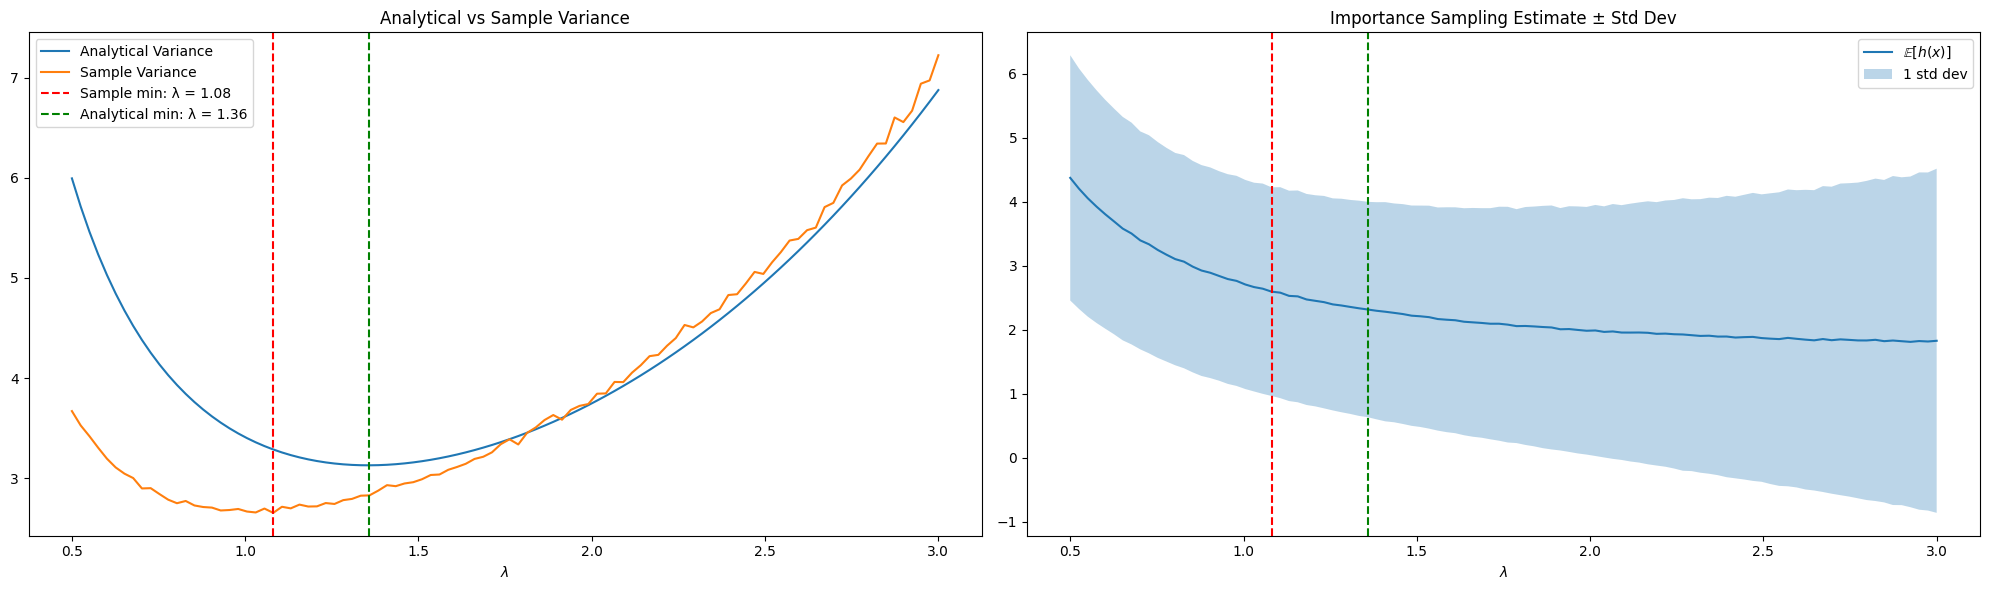

Empirical minimum variance at λ = 1.0808
Analytical minimum variance at λ = 1.3586


In [19]:
n = 100
vars = np.empty(n)
means = np.empty(n)
lambdas = np.linspace(0.5, 3.0, n)

def analytical_variance(xs):
    squared_variance = (np.exp(1) - 1) ** 2
    variance_of_square = 1 / xs / (2 + xs) * (np.exp(2 + xs) - 1)
    return variance_of_square - squared_variance

for i, gamma in enumerate(lambdas):
    g = expon(scale=1/gamma)
    gs = g.rvs(size=100_000)

    samples = np.exp(gs) * uniform.pdf(gs) / g.pdf(gs)
    samples = samples[gs <= 1]  

    means[i] = np.mean(samples)
    vars[i] = np.var(samples)

min_idx = np.argmin(vars)
analyt_vars = analytical_variance(lambdas)
analyt_min_idx = np.argmin(analyt_vars)
stds = np.sqrt(vars)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title("Analytical vs Sample Variance")
ax1.plot(lambdas, analyt_vars, label="Analytical Variance")
ax1.plot(lambdas, vars, label="Sample Variance")
ax1.set_xlabel(r"$\lambda$")
ax1.axvline(lambdas[min_idx], linestyle="--", color="r", 
            label=f"Sample min: λ = {lambdas[min_idx]:.2f}")
ax1.axvline(lambdas[analyt_min_idx], linestyle="--", color="g", 
            label=f"Analytical min: λ = {lambdas[analyt_min_idx]:.2f}")
ax1.legend()

ax2.plot(lambdas, means, label=r"$\mathbb{E}[h(x)]$")
ax2.fill_between(lambdas, means - stds, means + stds, alpha=0.3, label="1 std dev")
ax2.axvline(lambdas[min_idx], linestyle="--", color="r")
ax2.axvline(lambdas[analyt_min_idx], linestyle="--", color="g")
ax2.set_title("Importance Sampling Estimate ± Std Dev")
ax2.set_xlabel(r"$\lambda$")
ax2.legend()
plt.tight_layout()
plt.show()
print(f"Empirical minimum variance at λ = {lambdas[min_idx]:.4f}")
print(f"Analytical minimum variance at λ = {lambdas[analyt_min_idx]:.4f}")

The result shows that importance sampling significantly reduces the variance of the estimator for the integral, and that the optimal choice of $\lambda$ (which is around 1.36 analytically) minimizes this variance. The sample  minimum $\lambda$ is somewhat close to analytical $\lambda$, confirming the effectiveness of tuning $\lambda$ and changing its values to optimize for efficiency.